# **Day17**: *Clumsy Crucible*

## Part 1

The lava starts flowing rapidly once the Lava Production Facility is operational. As you leave, the reindeer offers you a parachute, allowing you to quickly reach Gear Island.

As you descend, your bird's-eye view of Gear Island reveals why you had trouble finding anyone on your way up: half of Gear Island is empty, but the half below you is a giant factory city!

You land near the gradually-filling pool of lava at the base of your new lavafall. Lavaducts will eventually carry the lava throughout the city, but to make use of it immediately, Elves are loading it into large crucibles on wheels.

The crucibles are top-heavy and pushed by hand. Unfortunately, the crucibles become very difficult to steer at high speeds, and so it can be hard to go in a straight line for very long.

To get Desert Island the machine parts it needs as soon as possible, you'll need to find the best way to get the crucible from the lava pool to the machine parts factory. To do this, you need to minimize heat loss while choosing a route that doesn't require the crucible to go in a straight line for too long.

Fortunately, the Elves here have a map (your puzzle input) that uses traffic patterns, ambient temperature, and hundreds of other parameters to calculate exactly how much heat loss can be expected for a crucible entering any particular city block.

For example:

```
2413432311323
3215453535623
3255245654254
3446585845452
4546657867536
1438598798454
4457876987766
3637877979653
4654967986887
4564679986453
1224686865563
2546548887735
4322674655533
```

Each city block is marked by a single digit that represents the amount of heat loss if the crucible enters that block. The starting point, the lava pool, is the top-left city block; the destination, the machine parts factory, is the bottom-right city block. (Because you already start in the top-left block, you don't incur that block's heat loss unless you leave that block and then return to it.)

Because it is difficult to keep the top-heavy crucible going in a straight line for very long, it can move at most three blocks in a single direction before it must turn 90 degrees left or right. The crucible also can't reverse direction; after entering each city block, it may only turn left, continue straight, or turn right.

One way to minimize heat loss is this path:

```
2>>34^>>>1323
32v>>>35v5623
32552456v>>54
3446585845v52
4546657867v>6
14385987984v4
44578769877v6
36378779796v>
465496798688v
456467998645v
12246868655<v
25465488877v5
43226746555v>
```

This path never moves more than three consecutive blocks in the same direction and incurs a heat loss of only 102.

Directing the crucible from the lava pool to the machine parts factory, but not moving more than three consecutive blocks in the same direction, what is the least heat loss it can incur?

### Solution

In [10]:

class Node:
    """A data class to represent a node for A* pathfinding algorithm"""

    def __init__(self, position=None, parent=None):
        self.position = position
        self.x, self.y = position
        self.parent = parent  # parent node

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position
    
    def __repr__(self) -> str:
        return f'Node{self.position}'
    
    def get_previous_directions(self, n=3):
        node = self
        directions = []
        for i in range(n):
            if node and node.parent:
                dx = node.x - node.parent.x
                dy = node.y - node.parent.y
                directions.append((dx, dy))
                node = node.parent
        return directions

In [11]:
n1 = Node((0, 0))
n2 = Node((0, 1), parent = n1)
n3 = Node((0, 2), parent = n2)
n4 = Node((1, 2), parent = n3)
n5 = Node((2, 2), parent = n4)

n5.get_previous_directions(4)

[(1, 0), (1, 0), (0, 1), (0, 1)]

In [ ]:
from copy import deepcopy
class AStar:

    def __init__(self, grid, start_position, end_position):
        self.grid = grid
        # self.debug_grid = deepcopy(grid)
        self.xlim = (0, len(grid[0]))
        self.ylim = (0, len(grid))

        self.start_node = Node(start_position)
        self.end_node = Node(end_position)

        self.open_list = [self.start_node]
        self.closed_list = []
        self.steps = [(0,1), (0,-1), (1,0), (-1, 0)]

    def calculate_manhatten_distance(self, node:Node):
        """
        Calculate the manhatten distance between a `node` and the `end_node`
        """
        dx = abs(node.x - self.end_node.x)
        dy = abs(node.y - self.end_node.y)
        return dx + dy
    
    def position_is_valid(self, position):
        x, y = position
        if self.xlim[0]<=x<self.xlim[1] and self.ylim[0]<=y<self.ylim[1]:
            if self.grid[y][x] != 1:
                return True
        return False
    
    def get_path(self, node):
        path = []
        while node != self.start_node:
            path.append(node.position)
            node = node.parent
        return path[::-1]  # Return reversed path

    def search(self):
        while len(self.open_list) > 0:
            current_node = self.open_list.pop(0)
            self.closed_list.append(current_node)

            if current_node == self.end_node:
                path = self.get_path(current_node)
                return path
            
            # x, y = current_node.position
            # self.debug_grid[y][x] = 8

            children = []
            for dx, dy in self.steps:
                position = (current_node.x + dx, current_node.y + dy)
                if self.position_is_valid(position):
                    node = Node(position, parent=current_node)
                    children.append(node)
            
            for node in children:
                # check if node is closed
                if node in self.closed_list: 
                    continue
                
                

                # update g, h, f
                node.g = current_node.g + 1  # +1 square traveled
                node.h = self.calculate_manhatten_distance(node)
                node.f = node.g + node.h

                # compare g value with open nodes
                skip = False
                for open_node in self.open_list:
                    if node==open_node and node.g >= open_node.g:
                        skip = True
                if skip:
                    continue
                
                # insert node in open list
                self.open_list.append(node)
                self.open_list.sort(key=lambda node: node.f)
             

In [ ]:
grid = [
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
]

start = (0,0)
end = (9, 9)

a_star = AStar(grid, start, end)
print(a_star.search())

In [32]:
from copy import deepcopy

class Pathfinder:

    def __init__(self, grid, start_position, end_position):
        self.grid = grid
        self.debug_grid = deepcopy(grid)

        
        self.xlim = (0, len(grid[0]))
        self.ylim = (0, len(grid))

        self.start_node = Node(start_position)
        self.end_node = Node(end_position)

        self.open_list = [self.start_node]
        self.closed_list = []
        self.steps = [(0,1), (0,-1), (1,0), (-1, 0)]

    def calculate_manhatten_distance(self, node:Node):
        """
        Calculate the manhatten distance between a `node` and the `end_node`
        """
        dx = abs(node.x - self.end_node.x)
        dy = abs(node.y - self.end_node.y)
        return dx + dy
    
    def position_is_valid(self, position):
        x, y = position
        return (self.xlim[0]<=x<self.xlim[1] and self.ylim[0]<=y<self.ylim[1])
    
    def get_path(self, node):
        path = []
        while node != self.start_node:
            path.append(node.position)
            node = node.parent
        return path[::-1]  # Return reversed path

    def search(self):
        print()
        while len(self.open_list) > 0:
            current_node = self.open_list.pop(0)
            self.closed_list.append(current_node)
            

            x, y = current_node.position  
            self.debug_grid[y][x] = 0
            
            if current_node == self.end_node:
                path = self.get_path(current_node)
                return path

            children = []
            for dx, dy in self.steps:
                position = (current_node.x + dx, current_node.y + dy)
                
                if self.position_is_valid(position):
                    node = Node(position, parent=current_node)
                    previous_directions = node.get_previous_directions(3+1)
                    if all(d == previous_directions[0] for d in previous_directions) and len(previous_directions)==4:
                        continue
                    children.append(node)
            
            for node in children:
                # check if node is closed
                if node in self.closed_list: 
                    continue
                
                heat_loss = self.grid[node.y][node.x]

                # update g, h, f
                node.g = current_node.g + heat_loss  
                node.h = self.calculate_manhatten_distance(node)
                node.f = node.g + node.h

                # compare g value with open nodes
                skip = False
                for open_node in self.open_list:
                    if node==open_node and node.g > open_node.g:
                        skip = True
                if skip:
                    continue
                
                # insert node in open list
                self.open_list.append(node)
                self.open_list.sort(key=lambda node: node.f)
        print('Nope')
        
        
            

In [33]:
import matplotlib.pyplot as plt

def my_func(input_string):
    grid = [list(map(int, line)) for line in input_string.splitlines()]
    start = (0,0)
    end = (len(grid[0])-1, len(grid)-1)
    pathfinder = Pathfinder(grid, start, end)
    path = pathfinder.search()

    visual = deepcopy(grid)
    for x,y in path:
        visual[y][x] = 0

    plt.imshow(grid, cmap='binary', interpolation='none')
    plt.show()
    plt.imshow(visual, cmap='binary', interpolation='none')
    plt.show()
    return sum(grid[y][x] for x,y in path)


### Example

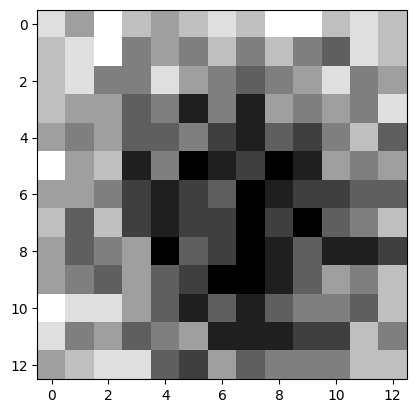

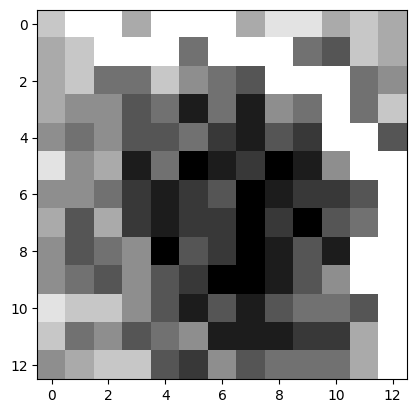

110

In [34]:
input_string = """2413432311323
3215453535623
3255245654254
3446585845452
4546657867536
1438598798454
4457876987766
3637877979653
4654967986887
4564679986453
1224686865563
2546548887735
4322674655533"""


my_func(input_string)


### Submission

In [35]:
with open('input/day17.txt', 'r') as file:
    input_string = file.read()

my_func(input_string)


## Part 2

text

### Solution

In [ ]:
def my_func(input_string):
    pass


### Example

In [ ]:
input_string = """"""


my_func(input_string)


### Submission

In [ ]:
with open('input/day00.txt', 'r') as file:
    input_string = file.read()


my_func(input_string)
